In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [12]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,2,3,np.nan,4,5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [64]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range("20181212",periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6,4),index = dates,columns=list('ABCD'))
df

DatetimeIndex(['2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2018-12-12,0.825783,0.815086,-0.732575,-0.030695
2018-12-13,-0.017063,0.793396,-0.871661,-1.745881
2018-12-14,-0.152810,0.001687,-1.042366,-0.093260
2018-12-15,1.602080,0.590778,1.167315,-0.048460
2018-12-16,-0.210991,0.212509,0.137745,0.308579
2018-12-17,-0.741705,0.238565,-0.142258,-0.049261


In [65]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({'A':1,
                    'B':pd.date_range("20181212",periods=7),
                    'C':pd.Series(1,index=list(range(7)),dtype='float32'),
                    'D':np.array([3]*7,dtype="int32"),
                    'E':pd.Categorical(["Monday","Tuesday","Wednesday","Thusday","Friday","Saturday","Sunday"]),
                    "F":"Lazy",
                    "G":np.random.randn(7)
                   })
df2

,A,B,C,D,E,F,G
0,1,2018-12-12,1.0,3,Monday,Lazy,0.276013
1,1,2018-12-13,1.0,3,Tuesday,Lazy,1.032188
2,1,2018-12-14,1.0,3,Wednesday,Lazy,0.532339
3,1,2018-12-15,1.0,3,Thusday,Lazy,1.005169
4,1,2018-12-16,1.0,3,Friday,Lazy,0.973329
5,1,2018-12-17,1.0,3,Saturday,Lazy,-0.085295
6,1,2018-12-18,1.0,3,Sunday,Lazy,1.372584


In [66]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
G           float64
dtype: object

In [67]:
# Here is how to view the top and bottom rows of the frame:
df.head(1)

,A,B,C,D
2018-12-12,0.825783,0.815086,-0.732575,-0.030695


In [68]:
df.tail(2)

,A,B,C,D
2018-12-16,-0.210991,0.212509,0.137745,0.308579
2018-12-17,-0.741705,0.238565,-0.142258,-0.049261


In [69]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17'],
              dtype='datetime64[ns]', freq='D')

In [70]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [71]:
df.values

array([[ 8.25782686e-01,  8.15086038e-01, -7.32575366e-01,
        -3.06947666e-02],
       [-1.70634606e-02,  7.93396156e-01, -8.71661260e-01,
        -1.74588117e+00],
       [-1.52809504e-01,  1.68692575e-03, -1.04236595e+00,
        -9.32597979e-02],
       [ 1.60207957e+00,  5.90778368e-01,  1.16731496e+00,
        -4.84601150e-02],
       [-2.10990903e-01,  2.12509178e-01,  1.37744590e-01,
         3.08578951e-01],
       [-7.41705139e-01,  2.38565424e-01, -1.42258306e-01,
        -4.92605495e-02]])

In [72]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.217549,0.442004,-0.247300,-0.276496
std,0.846510,0.338448,0.826786,0.734716
min,-0.741705,0.001687,-1.042366,-1.745881
25%,-0.196446,0.219023,-0.836890,-0.082260
50%,-0.084936,0.414672,-0.437417,-0.048860
75%,0.615071,0.742742,0.067744,-0.035136
max,1.602080,0.815086,1.167315,0.308579


In [73]:
# Transposing your data:
df.T

,2018-12-12 00:00:00,2018-12-13 00:00:00,2018-12-14 00:00:00,2018-12-15 00:00:00,2018-12-16 00:00:00,2018-12-17 00:00:00
A,0.825783,-0.017063,-0.152810,1.602080,-0.210991,-0.741705
B,0.815086,0.793396,0.001687,0.590778,0.212509,0.238565
C,-0.732575,-0.871661,-1.042366,1.167315,0.137745,-0.142258
D,-0.030695,-1.745881,-0.093260,-0.048460,0.308579,-0.049261


In [74]:
# Sorting by an axis: axis=1 表示列的index;ascending=False表示降序排列
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-12-12,-0.030695,-0.732575,0.815086,0.825783
2018-12-13,-1.745881,-0.871661,0.793396,-0.017063
2018-12-14,-0.093260,-1.042366,0.001687,-0.152810
2018-12-15,-0.048460,1.167315,0.590778,1.602080
2018-12-16,0.308579,0.137745,0.212509,-0.210991
2018-12-17,-0.049261,-0.142258,0.238565,-0.741705


In [81]:
# Sorting by values:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2018-12-12,0.825783,0.815086,-0.732575,-0.030695
2018-12-13,-0.017063,0.793396,-0.871661,-1.745881
2018-12-15,1.602080,0.590778,1.167315,-0.048460
2018-12-17,-0.741705,0.238565,-0.142258,-0.049261
2018-12-16,-0.210991,0.212509,0.137745,0.308579
2018-12-14,-0.152810,0.001687,-1.042366,-0.093260


In [78]:
# Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2018-12-12    0.825783
2018-12-13   -0.017063
2018-12-14   -0.152810
2018-12-15    1.602080
2018-12-16   -0.210991
2018-12-17   -0.741705
Freq: D, Name: A, dtype: float64

In [89]:
# Selecting via [], which slices the rows.
df[3:5]

,A,B,C,D
2018-12-15,1.602080,0.590778,1.167315,-0.048460
2018-12-16,-0.210991,0.212509,0.137745,0.308579


In [88]:
df["2018-12-15":"2018-12-17"]

,A,B,C,D
2018-12-15,1.602080,0.590778,1.167315,-0.048460
2018-12-16,-0.210991,0.212509,0.137745,0.308579
2018-12-17,-0.741705,0.238565,-0.142258,-0.049261


In [90]:
# For getting a cross section using a label:
df.loc[dates[0]]

A    0.825783
B    0.815086
C   -0.732575
D   -0.030695
Name: 2018-12-12 00:00:00, dtype: float64

In [97]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-12-12,0.825783,0.815086
2018-12-13,-0.017063,0.793396
2018-12-14,-0.152810,0.001687
2018-12-15,1.602080,0.590778
2018-12-16,-0.210991,0.212509
2018-12-17,-0.741705,0.238565


In [99]:
# Showing label slicing, both endpoints are included:
df.loc['2018-12-12':'2018-12-14',['A','B']]

,A,B
2018-12-12,0.825783,0.815086
2018-12-13,-0.017063,0.793396
2018-12-14,-0.152810,0.001687


In [101]:
# For getting a scalar value:
df.loc[dates[0],'A']

0.8257826858247442

In [111]:
df2 = df.copy()
df2['E'] = ['one','two','three','four','five','six']
df2

,A,B,C,D,E
2018-12-12,0.825783,0.815086,-0.732575,-0.030695,one
2018-12-13,-0.017063,0.793396,-0.871661,-1.745881,two
2018-12-14,-0.152810,0.001687,-1.042366,-0.093260,three
2018-12-15,1.602080,0.590778,1.167315,-0.048460,four
2018-12-16,-0.210991,0.212509,0.137745,0.308579,five
2018-12-17,-0.741705,0.238565,-0.142258,-0.049261,six


In [112]:
df2[df2['E'].isin(['one','two'])]

,A,B,C,D,E
2018-12-12,0.825783,0.815086,-0.732575,-0.030695,one
2018-12-13,-0.017063,0.793396,-0.871661,-1.745881,two


In [113]:
pd.Series([1,2,3,4,5,6],index=pd.date_range("20181212",periods=6))

2018-12-12    1
2018-12-13    2
2018-12-14    3
2018-12-15    4
2018-12-16    5
2018-12-17    6
Freq: D, dtype: int64

In [120]:
# See more at Histogramming and Discretization.
s = pd.Series(np.random.randint(0,7,size = 10))
s

0    5
1    2
2    0
3    1
4    3
5    5
6    0
7    3
8    1
9    4
dtype: int64

In [121]:
# 对values值进行统计次数
s.value_counts()

5    2
3    2
1    2
0    2
4    1
2    1
dtype: int64

In [139]:
df3 = pd.DataFrame({"A":[1,2,3,2,4,5],
                    "B":[2,5,2,5,1,6],
                    "C":[1,2,5,2,5,6],
                    "D":[2,5,4,2,3,6],
})
df3.apply(pd.value_counts).fillna(0)

,A,B,C,D
1,1.0,1.0,1.0,0.0
2,2.0,2.0,2.0,2.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0
5,1.0,2.0,2.0,1.0
6,0.0,1.0,1.0,1.0


In [141]:
# Concatenating pandas objects together with concat():
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.013157,0.133271,1.250844,1.368552
1,1.313274,-0.082290,-0.437799,0.419817
2,-1.643517,-0.221406,0.159375,1.013305
3,1.583400,0.248909,0.886055,-0.643460
4,0.702528,-0.050497,1.279632,0.219008
5,0.391630,-0.486289,-2.613587,-1.531806
6,-1.381101,-1.398099,-1.714568,0.214688
7,-1.712441,1.042233,-0.212952,-0.899801
8,-0.169561,1.433834,-1.031558,0.333349
9,1.618277,0.120132,-1.901873,-0.202638


In [143]:
# break it into pieces
pieces = [df[:3],df[3:7],df[2:4]]
pieces

[          0         1         2         3
 0  0.013157  0.133271  1.250844  1.368552
 1  1.313274 -0.082290 -0.437799  0.419817
 2 -1.643517 -0.221406  0.159375  1.013305,
           0         1         2         3
 3  1.583400  0.248909  0.886055 -0.643460
 4  0.702528 -0.050497  1.279632  0.219008
 5  0.391630 -0.486289 -2.613587 -1.531806
 6 -1.381101 -1.398099 -1.714568  0.214688,
           0         1         2         3
 2 -1.643517 -0.221406  0.159375  1.013305
 3  1.583400  0.248909  0.886055 -0.643460]

In [146]:
result = pd.concat(pieces)
result

,0,1,2,3
0,0.013157,0.133271,1.250844,1.368552
1,1.313274,-0.082290,-0.437799,0.419817
2,-1.643517,-0.221406,0.159375,1.013305
3,1.583400,0.248909,0.886055,-0.643460
4,0.702528,-0.050497,1.279632,0.219008
5,0.391630,-0.486289,-2.613587,-1.531806
6,-1.381101,-1.398099,-1.714568,0.214688
2,-1.643517,-0.221406,0.159375,1.013305
3,1.583400,0.248909,0.886055,-0.643460


In [155]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
result = pd.merge(left,right,on='key')
result

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


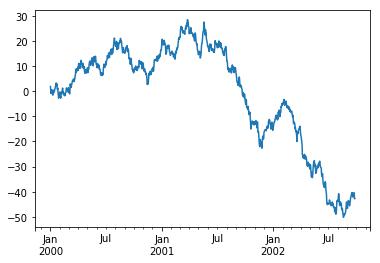

In [162]:
# See the Plotting docs.
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

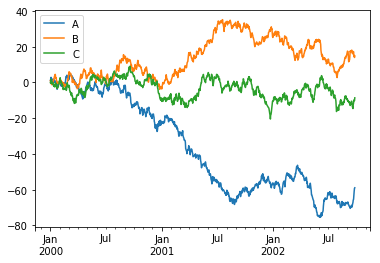

In [170]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 3), index=ts.index,
                 columns=['A', 'B', 'C'])
df = df.cumsum()
plt.figure(1) 
df.plot()
plt.legend(loc='best')

In [172]:
pd.read_csv('train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
